# Overview
This is our teams first attempt to explore the MTA Data!!

-  Stations with maximum traffic 
    - Traffic = Entries + Exit
-  Aggregated Traffic by Month for all stations
-  Aggregate data by time across stations
-  Office Locations by Stations
-  Explore data for 2 years
-  Cleaning Data
    -  See if there any nulls
    -  See if the station names have errors
    
    


Below are some Maps and images for visual reference:
<img src="MTA_RAIL_MAP.jpg" width="500" height="600"></img>
<img src="TechCompany_MAP.png" width="500" height="600"></img>

|S.No |Neighborhood   |  %|
|------|--------------|----| 
|1.| Financial District|    39%|
|2.| Midtown South|    32%|
|3.| Turtle Bay|    31%|
|4.| Murray Hill|    30%|
|5.| Noho|    30%||
|6.| Fulton/Seaport |   29%|
|8.| Greenwich Village |   28%|
|9.| Upper East Side|    27.5%
|10.| Kips Bay|    27%|
|11.| Chelsea|    27%|
|12.| West Chelsea|    27%|
|13.| Hunters Point|    26%|
|14.| Jamaica Estates|    26%|
|15.| Yorkville|    26%|

In [108]:
# import the python libraries
import pandas as pd
import numpy as np
import math


In [107]:
# This file is a merged across the two years of MTA Turnstile data
#The data file is merged using shell script
# The files were downloaded, scraped and Cleaned using a mix of Beautiful Soup and Shell Script SED commands
# This is relatively a large file
mta_data = pd.read_csv("merged_file.txt")

In [106]:
# Sample Reference for a single file
mta_data_1df = pd.read_csv("turnstile_190330.txt")

## Exploring the Data

The next steps we will explore the data to get a better understanding of the data

In [101]:
# Lets look at the
mta_data.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/30/2017,03:00:00,REGULAR,6463109,2187558
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/30/2017,07:00:00,REGULAR,6463119,2187567
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/30/2017,11:00:00,REGULAR,6463178,2187654
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/30/2017,15:00:00,REGULAR,6463373,2187736
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/30/2017,19:00:00,REGULAR,6463712,2187803


In [102]:
len(mta_data)

10346286

In [33]:
# Looking at the Stations, it may be easiest to place 
stations = mta_data["STATION"].unique()
stations_1df = mta_data_1df["STATION"].unique()

In [104]:
# Print the number of Stations
print len(stations), len(stations_1df)

379 377


In [45]:
stations_1df_set = set(stations_1df)
station_set =  set(stations)
station_set.difference(stations_1df_set)

{'ASTORIA BLVD', 'ORCHARD BEACH'}

In [73]:
mta_cleaned_data = mta_data[(mta_data.EXITS != 0) | (mta_data.ENTRIES != 0)]

### Group by


In [62]:
mta_entries_exit_by_station = mta_cleaned_data.groupby(['STATION'])[["ENTRIES","EXITS"]].agg('sum')

In [63]:
list(mta_cleaned_data)

['C/A',
 'UNIT',
 'SCP',
 'STATION',
 'LINENAME',
 'DIVISION',
 'DATE',
 'TIME',
 'DESC',
 'ENTRIES',
 'EXITS',
 'TOTAL']

In [64]:
mta_entries_exit_by_station.describe()

,ENTRIES,EXITS
count,3.790000e+02,3.790000e+02
mean,1.090337e+12,8.949733e+11
std,2.436309e+12,2.241357e+12
min,3.533728e+08,2.119119e+07
25%,3.368167e+10,2.095275e+10
50%,1.197271e+11,5.559705e+10
75%,6.058893e+11,2.801909e+11
max,1.682874e+13,1.536059e+13


In [65]:
mta_entries_exit_by_station.sort_values(by="ENTRIES", ascending=False).head(10)

,ENTRIES,EXITS
STATION,,
42 ST-PORT AUTH,16828740462843,13744032052758
23 ST,13321602809454,14827887044990
TIMES SQ-42 ST,12910320237132,10022219506020
CANAL ST,12611684827065,13019237465731
34 ST-HERALD SQ,11914849351701,15360594926974
CHAMBERS ST,11156245512265,9780314452762
125 ST,10610710045989,5641680603273
104 ST,10595786665982,7701347630057
14 ST,10127543642334,7169198651179


In [15]:
mta_entries_exit_by_station.sort_values(by="EXITS", ascending=False).head(10)

,ENTRIES,EXITS
STATION,,
34 ST-HERALD SQ,11914849351701,15360594926974
23 ST,13321602809454,14827887044990
42 ST-PORT AUTH,16828740462843,13744032052758
CANAL ST,12611684827065,13019237465731
72 ST,7895307420579,10394786470178
TIMES SQ-42 ST,12910320237132,10022219506020
CHAMBERS ST,11156245512265,9780314452762
FULTON ST,9482158762720,9549060309270
HIGH ST,6046892240570,8134440530949


In [66]:
mta_cleaned_data['TOTAL'] = mta_cleaned_data['ENTRIES'] + mta_cleaned_data['EXITS']

/Users/shivajidutta/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [39]:
mta_cleaned_data

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,TOTAL
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/30/2017,03:00:00,REGULAR,6463109,2187558,8650667
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/30/2017,07:00:00,REGULAR,6463119,2187567,8650686
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/30/2017,11:00:00,REGULAR,6463178,2187654,8650832
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/30/2017,15:00:00,REGULAR,6463373,2187736,8651109
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/30/2017,19:00:00,REGULAR,6463712,2187803,8651515
5,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/30/2017,23:00:00,REGULAR,6463887,2187833,8651720
6,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/31/2017,03:00:00,REGULAR,6463926,2187844,8651770
7,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/31/2017,07:00:00,REGULAR,6463938,2187856,8651794
8,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/31/2017,11:00:00,REGULAR,6463980,2187919,8651899
9,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/31/2017,15:00:00,REGULAR,6464138,2187969,8652107


In [40]:
mta_total_by_station = mta_cleaned_data.groupby(['STATION'], as_index=False)[["TOTAL"]].agg('sum')

In [41]:
mta_top_10_stations = mta_total_by_station.sort_values(by="TOTAL", ascending=False).head(10)

## Graphing

This is to graph the data

* !pip install seaborn

In [42]:
import matplotlib as plt

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")
%matplotlib inline

In [74]:
mta_total_by_station

,STATION,TOTAL
0,1 AV,9815464826770
1,103 ST,1848762107626
2,103 ST-CORONA,295930712959
3,104 ST,18297134296039
4,110 ST,152070148160
5,111 ST,395570765925
6,116 ST,7280996156929
7,116 ST-COLUMBIA,3271327532157
8,121 ST,1452666019019
9,125 ST,16252390649262


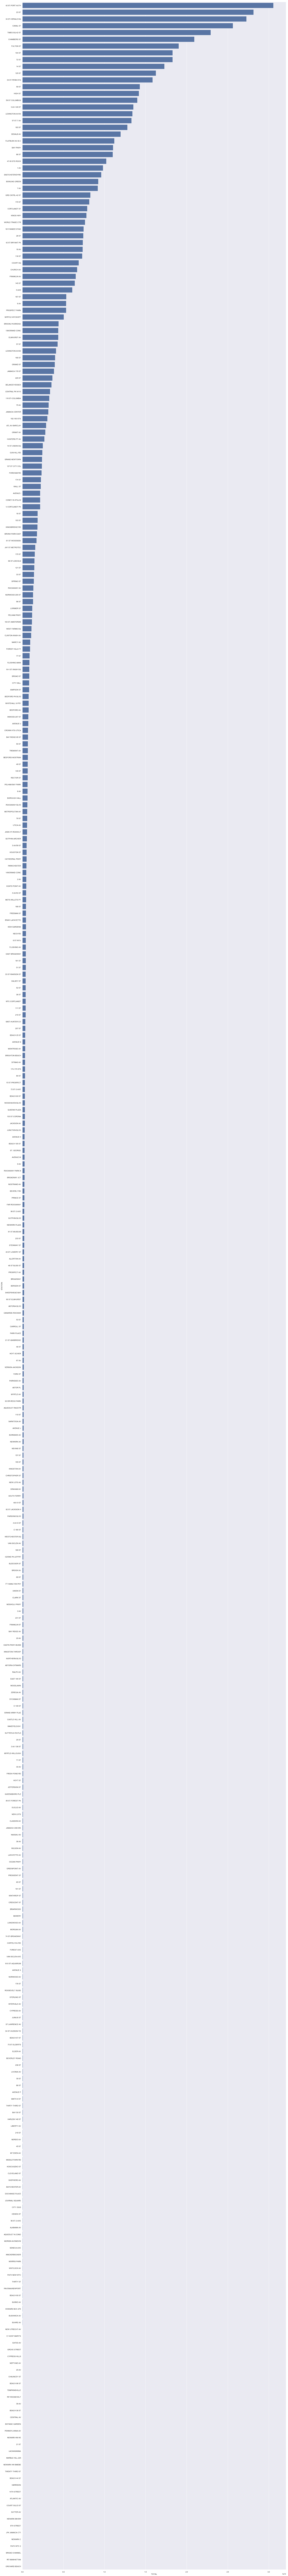

In [109]:
plt.figure(figsize=(30,300))
mta_total_by_station = mta_total_by_station.sort_values(by="TOTAL", ascending=False)
sns.barplot(y='STATION', x='TOTAL', data=mta_total_by_station, color='b');

In [45]:
mta_top_10_stations

,STATION,TOTAL
68,42 ST-PORT AUTH,30572772515601
46,23 ST,28149489854444
59,34 ST-HERALD SQ,27275444278675
173,CANAL ST,25630922292796
353,TIMES SQ-42 ST,22932539743152
180,CHAMBERS ST,20936559965027
226,FULTON ST,19031219071990
3,104 ST,18297134296039
97,72 ST,18290093890757
13,14 ST,17296742293513


In [46]:
mta_cleaned_data.describe()

,ENTRIES,EXITS,TOTAL
count,1.034446e+07,1.034446e+07,1.034446e+07
mean,3.994771e+07,3.279000e+07,7.273771e+07
std,2.070538e+08,1.912516e+08,3.773676e+08
min,0.000000e+00,0.000000e+00,1.000000e+00
25%,4.801810e+05,2.286080e+05,8.905172e+05
50%,2.498764e+06,1.413961e+06,4.710246e+06
75%,6.904690e+06,4.810978e+06,1.241259e+07
max,2.144893e+09,2.146093e+09,3.968876e+09


In [47]:
list(mta_cleaned_data)

['C/A',
 'UNIT',
 'SCP',
 'STATION',
 'LINENAME',
 'DIVISION',
 'DATE',
 'TIME',
 'DESC',
 'ENTRIES',
 'EXITS',
 'TOTAL']

#### Cleaning Data : Removing the bad date

In [116]:
valid_time_list = []
for i in mta_cleaned_data["TIME"].unique():
    if (i.split(":")[1] == "00" and i.split(":")[2] =="00"):
        valid_time_list.append(i)

mta_cleaned_data_filtered_valida_date = mta_cleaned_data.loc[mta_cleaned_data["TIME"].isin(valid_time_list)]       

In [119]:
mta_cleaned_data_filtered_valida_date["TIME"].unique()

array(['03:00:00', '07:00:00', '11:00:00', '15:00:00', '19:00:00',
       '23:00:00', '01:00:00', '05:00:00', '09:00:00', '13:00:00',
       '17:00:00', '21:00:00', '00:00:00', '04:00:00', '08:00:00',
       '12:00:00', '16:00:00', '20:00:00', '02:00:00', '06:00:00',
       '10:00:00', '14:00:00', '18:00:00', '22:00:00'], dtype=object)

In [28]:
mta_cleaned_data[mta_cleaned_data["TIME"] == "15:48:59"]

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,TOTAL
8345,A049,R088,02-00-00,CORTLANDT ST,RNW,BMT,01/04/2018,15:48:59,REGULAR,477942,511885,989827
8396,A049,R088,02-00-01,CORTLANDT ST,RNW,BMT,01/04/2018,15:48:59,REGULAR,542908,338886,881794
8447,A049,R088,02-00-02,CORTLANDT ST,RNW,BMT,01/04/2018,15:48:59,REGULAR,506114,247084,753198
8498,A049,R088,02-00-03,CORTLANDT ST,RNW,BMT,01/04/2018,15:48:59,REGULAR,871885500,871476797,1743362297
8549,A049,R088,02-01-00,CORTLANDT ST,RNW,BMT,01/04/2018,15:48:59,REGULAR,553465,1159261,1712726
8600,A049,R088,02-01-01,CORTLANDT ST,RNW,BMT,01/04/2018,15:48:59,REGULAR,594024,1643913,2237937
8651,A049,R088,02-01-02,CORTLANDT ST,RNW,BMT,01/04/2018,15:48:59,REGULAR,850083,1311136,2161219
8702,A049,R088,02-03-00,CORTLANDT ST,RNW,BMT,01/04/2018,15:48:59,REGULAR,701415,163392,864807
8753,A049,R088,02-03-01,CORTLANDT ST,RNW,BMT,01/04/2018,15:48:59,REGULAR,495170,136961,632131
8804,A049,R088,02-03-02,CORTLANDT ST,RNW,BMT,01/04/2018,15:48:59,REGULAR,527243,185588,712831


In [29]:
#pd.to_datetime(mta_cleaned_data["TIME"])
import datetime as dt
temp_df = mta_cleaned_data["TIME"].head(10)

time_1 = pd.to_datetime(temp_df, format='%H:%M:%S').dt.time
#dt.time("00:00:00",format='%H:%M:%S')
    

In [30]:
time_1

0    03:00:00
1    07:00:00
2    11:00:00
3    15:00:00
4    19:00:00
5    23:00:00
6    03:00:00
7    07:00:00
8    11:00:00
9    15:00:00
Name: TIME, dtype: object

In [31]:
list(time_1)

[datetime.time(3, 0),
 datetime.time(7, 0),
 datetime.time(11, 0),
 datetime.time(15, 0),
 datetime.time(19, 0),
 datetime.time(23, 0),
 datetime.time(3, 0),
 datetime.time(7, 0),
 datetime.time(11, 0),
 datetime.time(15, 0)]

In [ ]:
sns.distplot(mta_cleaned_data["TIME"].head)

In [33]:
df_data = mta_cleaned_data["TIME"].head(100)

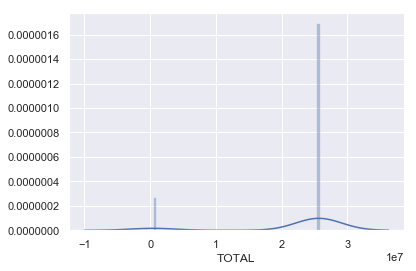

In [66]:
sns.distplot(mta_cleaned_data[mta_cleaned_data["STATION"] == "42 ST-PORT AUTH"]["TOTAL"].head(100))

In [69]:
mta_cleaned_data[(mta_cleaned_data["STATION"] == "42 ST-PORT AUTH") & (mta_cleaned_data["SCP"] == "01-00-02")].head(100)

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,TOTAL
49087,N060,R010,01-00-02,42 ST-PORT AUTH,ACENGRS1237W,IND,12/30/2017,01:00:00,REGULAR,179486,233373,412859
49088,N060,R010,01-00-02,42 ST-PORT AUTH,ACENGRS1237W,IND,12/30/2017,05:00:00,REGULAR,179564,233388,412952
49089,N060,R010,01-00-02,42 ST-PORT AUTH,ACENGRS1237W,IND,12/30/2017,09:00:00,REGULAR,179602,233469,413071
49090,N060,R010,01-00-02,42 ST-PORT AUTH,ACENGRS1237W,IND,12/30/2017,13:00:00,REGULAR,179768,233796,413564
49091,N060,R010,01-00-02,42 ST-PORT AUTH,ACENGRS1237W,IND,12/30/2017,17:00:00,REGULAR,180162,234285,414447
49092,N060,R010,01-00-02,42 ST-PORT AUTH,ACENGRS1237W,IND,12/30/2017,21:00:00,REGULAR,180513,234827,415340
49093,N060,R010,01-00-02,42 ST-PORT AUTH,ACENGRS1237W,IND,12/31/2017,01:00:00,REGULAR,180921,235004,415925
49094,N060,R010,01-00-02,42 ST-PORT AUTH,ACENGRS1237W,IND,12/31/2017,05:00:00,REGULAR,181008,235029,416037
49095,N060,R010,01-00-02,42 ST-PORT AUTH,ACENGRS1237W,IND,12/31/2017,09:00:00,REGULAR,181053,235103,416156
49096,N060,R010,01-00-02,42 ST-PORT AUTH,ACENGRS1237W,IND,12/31/2017,13:00:00,REGULAR,181312,235325,416637


In [71]:
scp_42nd_street = mta_cleaned_data[(mta_cleaned_data["STATION"] == "42 ST-PORT AUTH")]["SCP"].unique()

array(['01-00-00', '01-00-01', '01-00-02', '01-00-03', '01-00-04',
       '01-00-05', '01-03-00', '01-05-00', '01-05-01', '01-03-01',
       '01-03-02', '01-03-03', '01-03-04', '00-00-00', '00-00-01',
       '00-00-02', '00-00-03', '00-00-04', '00-00-05', '00-05-00',
       '00-05-01', '00-06-00', '00-06-01', '02-00-00', '02-00-01',
       '02-00-02', '02-00-03', '02-00-04', '02-03-00', '02-03-01',
       '02-06-00', '02-06-01', '02-06-02', '00-00-06', '00-00-07',
       '00-00-08', '00-00-09'], dtype=object)

In [72]:
station_name = "23 ST"
mta_cleaned_data[(mta_cleaned_data["STATION"] == station_name)]["SCP"].unique()


array(['01-00-00', '01-00-01', '01-00-02', '01-03-00', '01-03-01',
       '01-03-02', '01-06-00', '01-06-01', '00-00-00', '00-00-01',
       '00-00-02', '00-03-00', '00-03-01', '00-03-02', '01-05-00',
       '01-05-01', '00-06-00', '00-06-01', '02-00-00', '02-00-01',
       '02-00-02', '02-06-00', '02-06-01', '02-06-02', '00-00-03',
       '00-00-04', '01-00-03', '02-03-00', '02-03-01', '02-05-00',
       '02-05-01', '02-05-02', '03-05-00', '03-05-01', '03-06-00',
       '03-06-01', '00-00-05', '00-05-00', '00-05-01', '02-05-05'], dtype=object)

In [75]:
mta_42nd_street_data = mta_cleaned_data[(mta_cleaned_data["STATION"] == "42 ST-PORT AUTH")]

In [96]:
    mta_42nd_street_data.groupby(['SCP'])[["ENTRIES","EXITS"]].agg('sum')

,ENTRIES,EXITS
SCP,,
00-00-00,16774242895,9935412208
00-00-01,2861782962458,394372804487
00-00-02,542253809775,499358642953
00-00-03,25072362439,12762327781
00-00-04,123132550455,1805973407337
00-00-05,3499170011126,2074228564773
00-00-06,3148255839014,4073300617399
00-00-07,63156534835,14409905333
00-00-08,923471421759,672735634309


In [93]:
mta_42nd_steet_data_group_by_SCP[["ENTRIES","EXITS"]].agg('sum')

,ENTRIES,EXITS
LINENAME,,
ACENGRS1237W,222705087932,147319827243
ACENQRS1237W,16606035374911,13596712225515


In [97]:
mta_42nd_street_data.groupby(['SCP'])[["ENTRIES","EXITS"]].agg('sum')

,ENTRIES,EXITS
SCP,,
00-00-00,16774242895,9935412208
00-00-01,2861782962458,394372804487
00-00-02,542253809775,499358642953
00-00-03,25072362439,12762327781
00-00-04,123132550455,1805973407337
00-00-05,3499170011126,2074228564773
00-00-06,3148255839014,4073300617399
00-00-07,63156534835,14409905333
00-00-08,923471421759,672735634309
